In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv("test.csv")
df

,area,bedrooms,age,price
0,2104,3,15,399
1,1600,3,10,329
2,2400,3,20,369
3,1416,2,18,232
4,3000,4,30,539
5,1985,4,8,299
6,1534,3,30,314
7,1427,3,25,198
8,1380,3,15,212
9,2376,4,5,460


In [3]:
df.head()

,area,bedrooms,age,price
0,2104,3,15,399
1,1600,3,10,329
2,2400,3,20,369
3,1416,2,18,232
4,3000,4,30,539


In [4]:
df.describe()

,area,bedrooms,age,price
count,10.000000,10.000000,10.000000,10.000000
mean,1922.200000,3.200000,17.600000,335.100000
std,545.978184,0.632456,8.758488,109.935789
min,1380.000000,2.000000,5.000000,198.000000
25%,1453.750000,3.000000,11.250000,248.750000
50%,1792.500000,3.000000,16.500000,321.500000
75%,2308.000000,3.750000,23.750000,391.500000
max,3000.000000,4.000000,30.000000,539.000000


In [5]:
df.shape

(10, 4)

Text(0, 0.5, 'bedrooms')

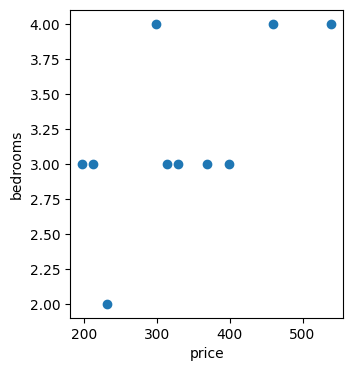

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.scatter(data=df,x='price',y='bedrooms')
plt.xlabel("price")
plt.ylabel("bedrooms")

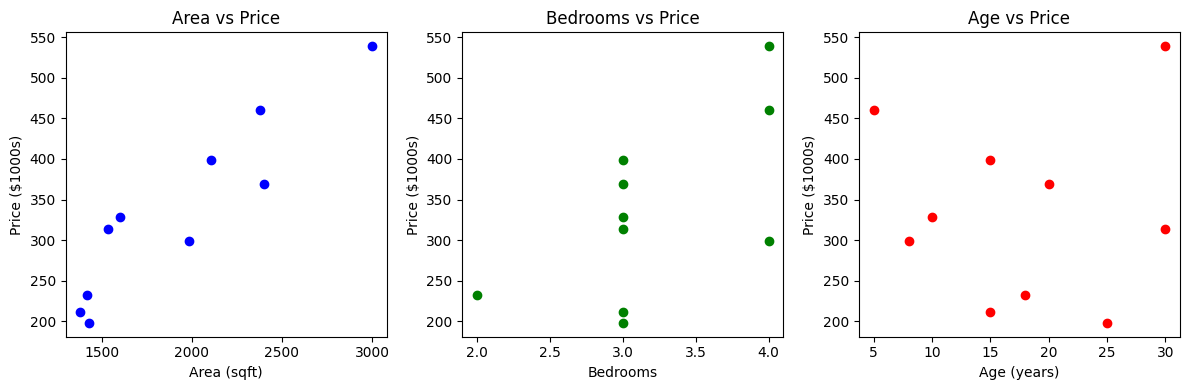

In [12]:
# Scatter plots for each feature vs price
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df["area"], df["price"], color='blue')
plt.xlabel("Area (sqft)")
plt.ylabel("Price ($1000s)")
plt.title("Area vs Price")

plt.subplot(1, 3, 2)
plt.scatter(df["bedrooms"], df["price"], color='green')
plt.xlabel("Bedrooms")
plt.ylabel("Price ($1000s)")
plt.title("Bedrooms vs Price")

plt.subplot(1, 3, 3)
plt.scatter(df["age"], df["price"], color='red')
plt.xlabel("Age (years)")
plt.ylabel("Price ($1000s)")
plt.title("Age vs Price")

plt.tight_layout()
plt.show()


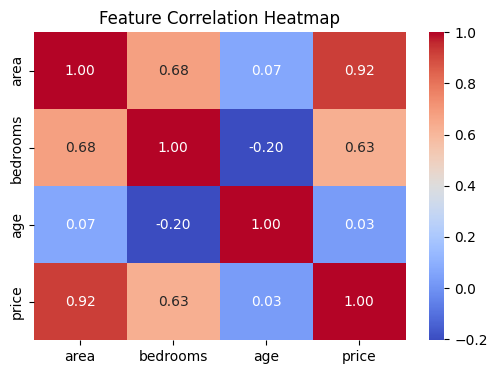

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [14]:
X = df[["area", "bedrooms", "age"]]
y = df['price']

In [19]:
X

,area,bedrooms,age
0,2104,3,15
1,1600,3,10
2,2400,3,20
3,1416,2,18
4,3000,4,30
5,1985,4,8
6,1534,3,30
7,1427,3,25
8,1380,3,15
9,2376,4,5


In [20]:
y

0    399
1    329
2    369
3    232
4    539
5    299
6    314
7    198
8    212
9    460
Name: price, dtype: int64

In [21]:
df.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()



In [28]:
X_train

,area,bedrooms,age
5,1985,4,8
0,2104,3,15
7,1427,3,25
2,2400,3,20
9,2376,4,5
4,3000,4,30
3,1416,2,18
6,1534,3,30


In [29]:
y_train

5    299
0    399
7    198
2    369
9    460
4    539
3    232
6    314
Name: price, dtype: int64

In [30]:
X_test


,area,bedrooms,age
8,1380,3,15
1,1600,3,10


In [26]:
X_train

,area,bedrooms,age
7,1427,3,25
2,2400,3,20
9,2376,4,5
4,3000,4,30
3,1416,2,18
6,1534,3,30


In [32]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred

array([227.86662415, 267.38594248])

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [40]:
mse



2024.0209226825425

In [42]:
r2


0.4085701153678012

In [43]:
model.coef_

array([0.18623253, 4.64199583, 0.29036763])

In [44]:
model.intercept_


np.float64(-47.41576856845734)